In [19]:
# pip install diffprivlib
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [20]:
import diffprivlib.models as dp

clf = dp.GaussianNB()
clf.fit(X_train, y_train)

C:\Users\Praxis\Anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:92: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


GaussianNB(bounds=[(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)], epsilon=1,
           priors=None, var_smoothing=1e-09)

In [21]:
clf.predict(X_test)

array([2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 0, 0, 1, 0, 0])

In [22]:
(clf.predict(X_test) == y_test).sum() / y_test.shape[0]

0.9333333333333333

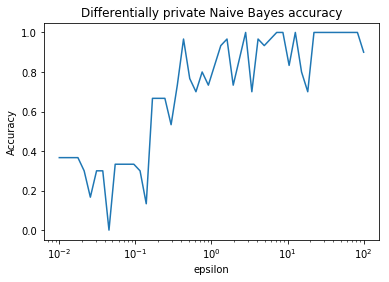

In [6]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = [(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)]
accuracy = list()

for epsilon in epsilons:
    clf = dp.GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append((clf.predict(X_test) == y_test).sum() / y_test.shape[0])

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show();

In [9]:
# now compare to ariginal
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
clf.predict(X_test)

array([2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 0, 1, 0, 0, 0, 2])

In [11]:
# Evaluate
(clf.predict(X_test) == y_test).sum() / y_test.shape[0]

1.0

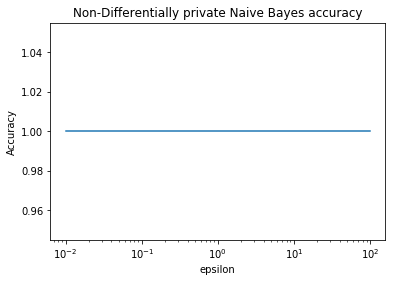

In [14]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = [(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)]
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    accuracy.append((clf.predict(X_test) == y_test).sum() / y_test.shape[0])

plt.semilogx(epsilons, accuracy)
plt.title("Non-Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show();